# Settings, Directory Specs, and Imports

In [16]:
# 0 = no streamlit
# 1 = test user inputs
# 2 = run in streamlit
streamlit_status = 0 
do_plots = 1

dir_read = '/Users/rachellehorwitz/Documents/ViTalErt/data/filtered02/'
#dir_read = '/Users/rachellehorwitz/Documents/VTAlert/over18_eicu/'

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

matplotlib.rcParams.update({'font.size': 22})

In [2]:
st.title('ViTalErt: Risk Monitoring for Venous Thromboembolism in ICU Patients')

# eICU Data Wrangling

In [3]:
# Read files from csv
patient = pd.read_csv(dir_read + 'patient.csv')
admissiondx = pd.read_csv(dir_read + 'admissiondx.csv')
diagnosis = pd.read_csv(dir_read + 'diagnosis.csv')
ptusid_pos = pd.read_csv(dir_read + 'pos_ptunitstayid.csv')

# Create dataframe of patientunitstayids in negative class
tmp = patient[~patient['patientunitstayid'].isin(ptusid_pos['patientunitstayid'])]
ptusid_neg = tmp[['patientunitstayid']]

# Create labels
ptusid_neg.loc[:, 'label'] = 0
ptusid_pos.loc[:, 'label'] = 1

# Add labels to "patient" dataframe and move 'label' column to left
ptusid_w_label = pd.concat([ptusid_pos, ptusid_neg])
ptusid_w_label.shape[0]
ptusid_w_label = ptusid_w_label.set_index('patientunitstayid')
patient = patient.set_index('patientunitstayid')
patient = patient.join(ptusid_w_label)

# Move 'label' column to left
cols = list(patient.columns)
cols = [cols[-1]] + cols[:-1]
patient = patient[cols]

# Remove patients who weigh less than 40 kg or more than 400 kg
patient = patient[(patient['admissionweight'] > 40) & \
                   (patient['admissionweight'] < 400)]

/Users/rachellehorwitz/opt/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rachellehorwitz/opt/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [4]:
patient_pos = patient[patient['label']==1]
patient_neg = patient[patient['label']==0]
patient[patient['label']==1].shape[0]

1970

In [5]:
# patient_pos = patient[patient['label']]

In [6]:
150656/152626

0.987092631661709

In [7]:
150656+1970

152626

# Defining X and y

In [8]:
# Define X and y
X = patient[['age', 'admissionweight']]
y = patient['label']

# Partition and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# X_test.iloc[0]

In [10]:
X_train['admissionweight'].nlargest(30)

patientunitstayid
397504     396.90
473823     362.80
2967305    350.60
461256     349.20
2705541    334.20
1822927    323.90
1992200    313.00
2357348    304.80
2167010    303.00
3210862    299.30
236346     297.70
654048     295.40
761424     295.10
1619352    294.80
2840943    294.80
2721381    294.80
1619353    294.80
2714092    293.93
3346882    291.60
1766797    290.00
1822140    287.30
908138     287.00
3134468    285.80
2616901    285.60
970632     285.50
1625000    282.80
2882498    282.00
232285     280.90
232286     280.90
2012382    278.70
Name: admissionweight, dtype: float64

<IPython.core.display.Javascript object>


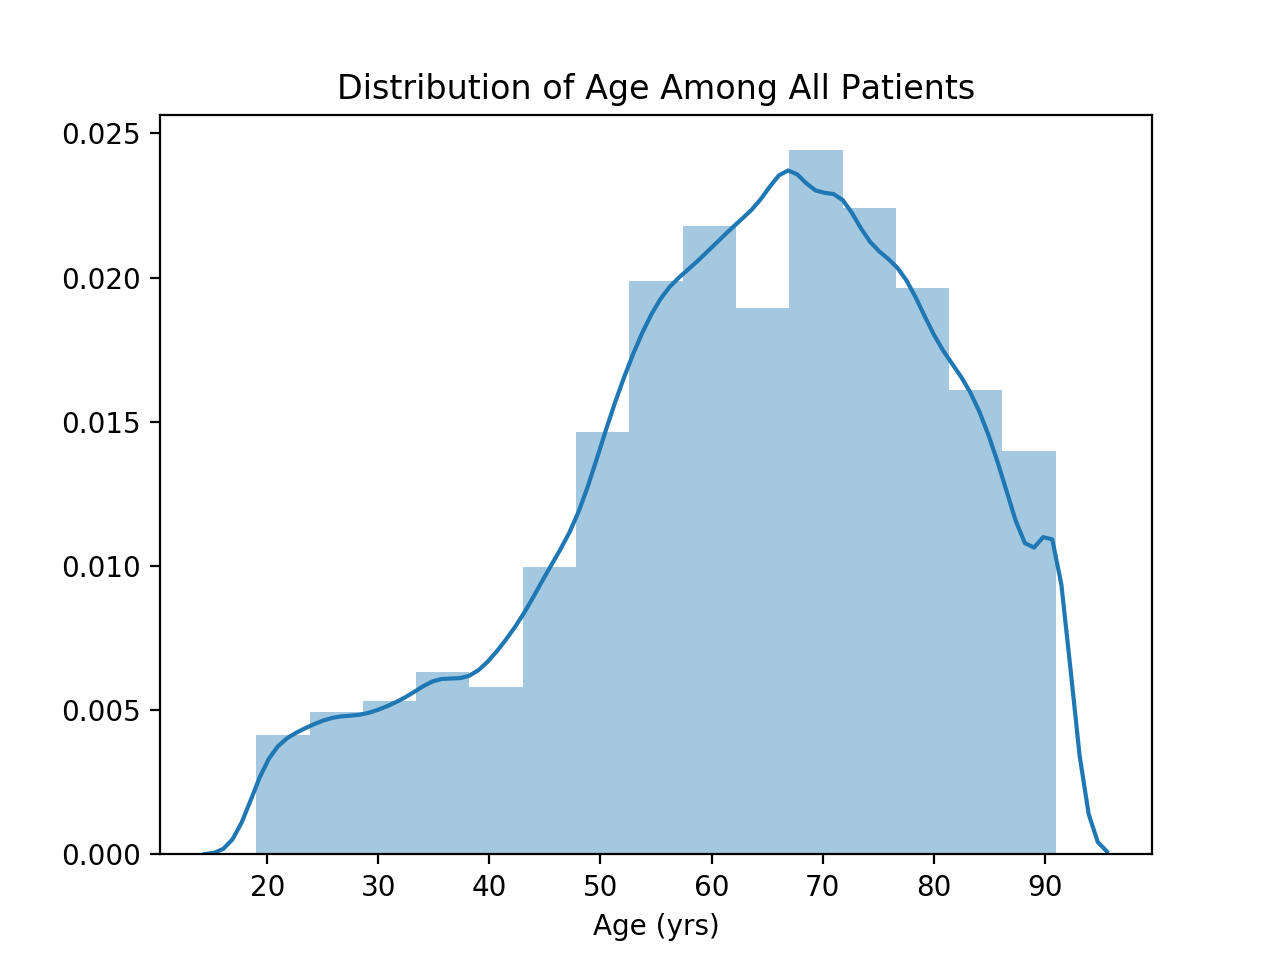

<IPython.core.display.Javascript object>


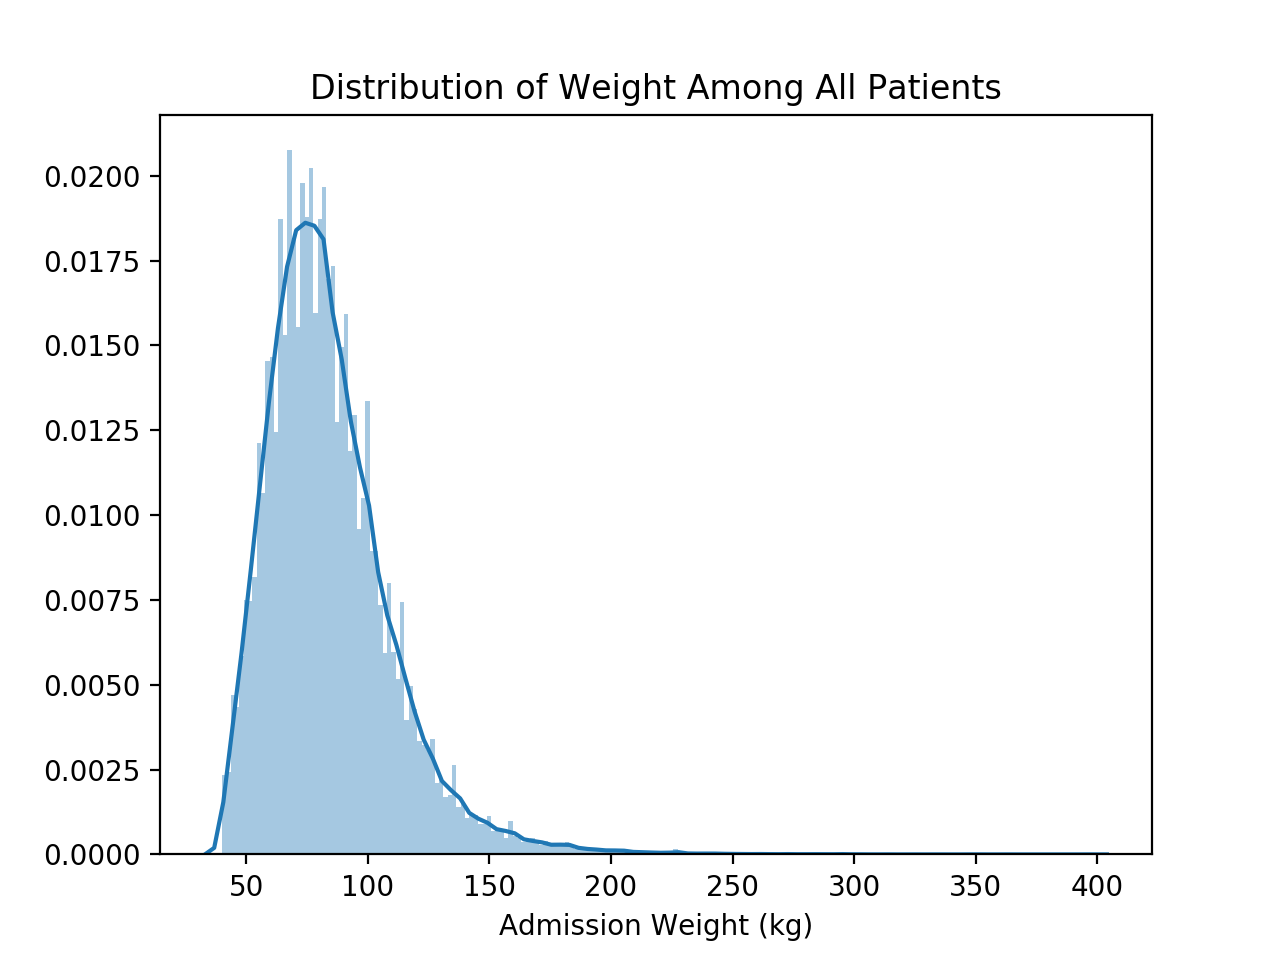

<IPython.core.display.Javascript object>


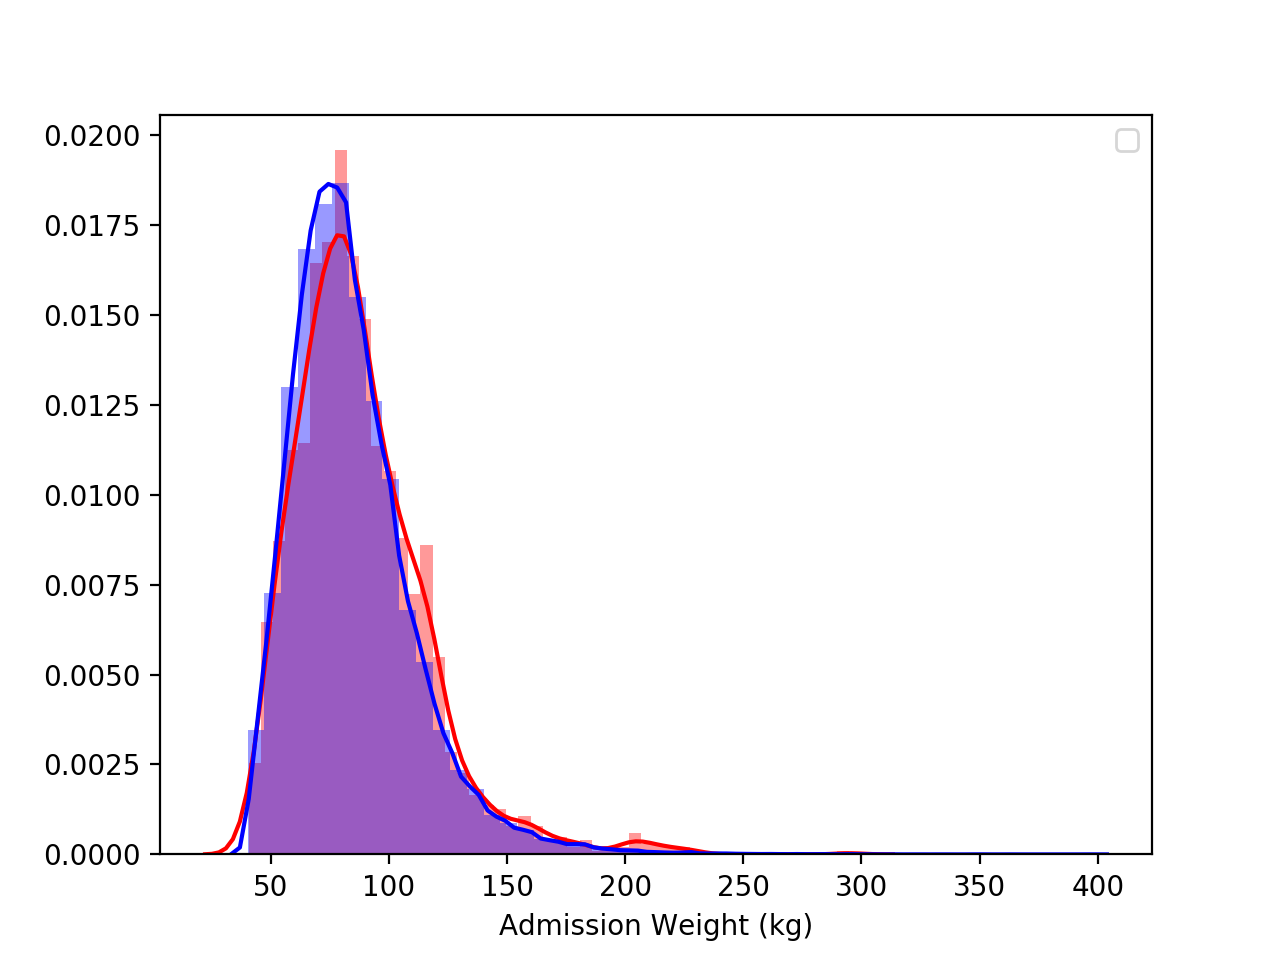

/Users/rachellehorwitz/opt/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'V' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/rachellehorwitz/opt/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/rachellehorwitz/opt/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Legend does not support 'E' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


<IPython.core.display.Javascript object>


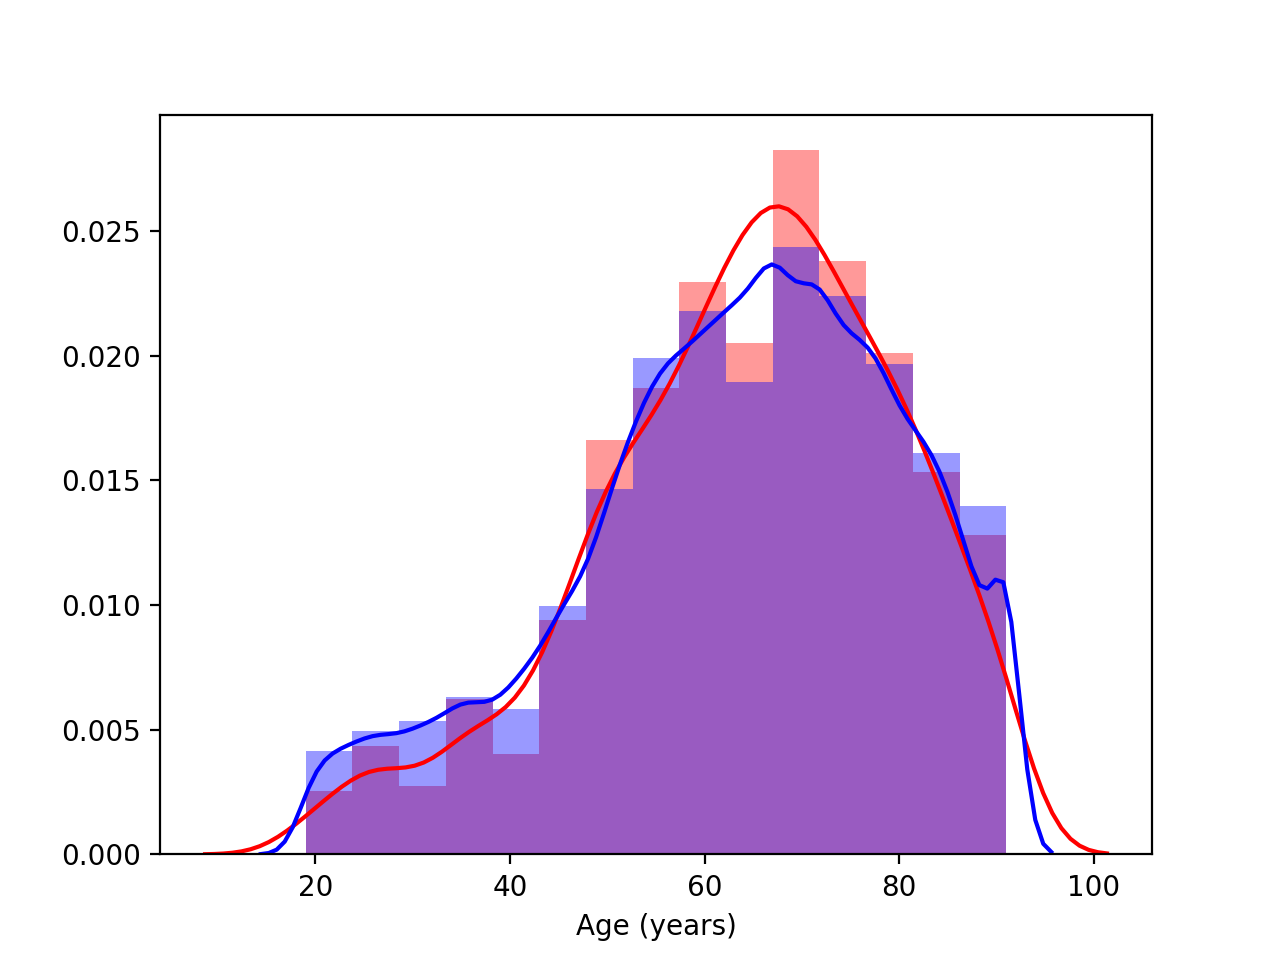

<IPython.core.display.Javascript object>


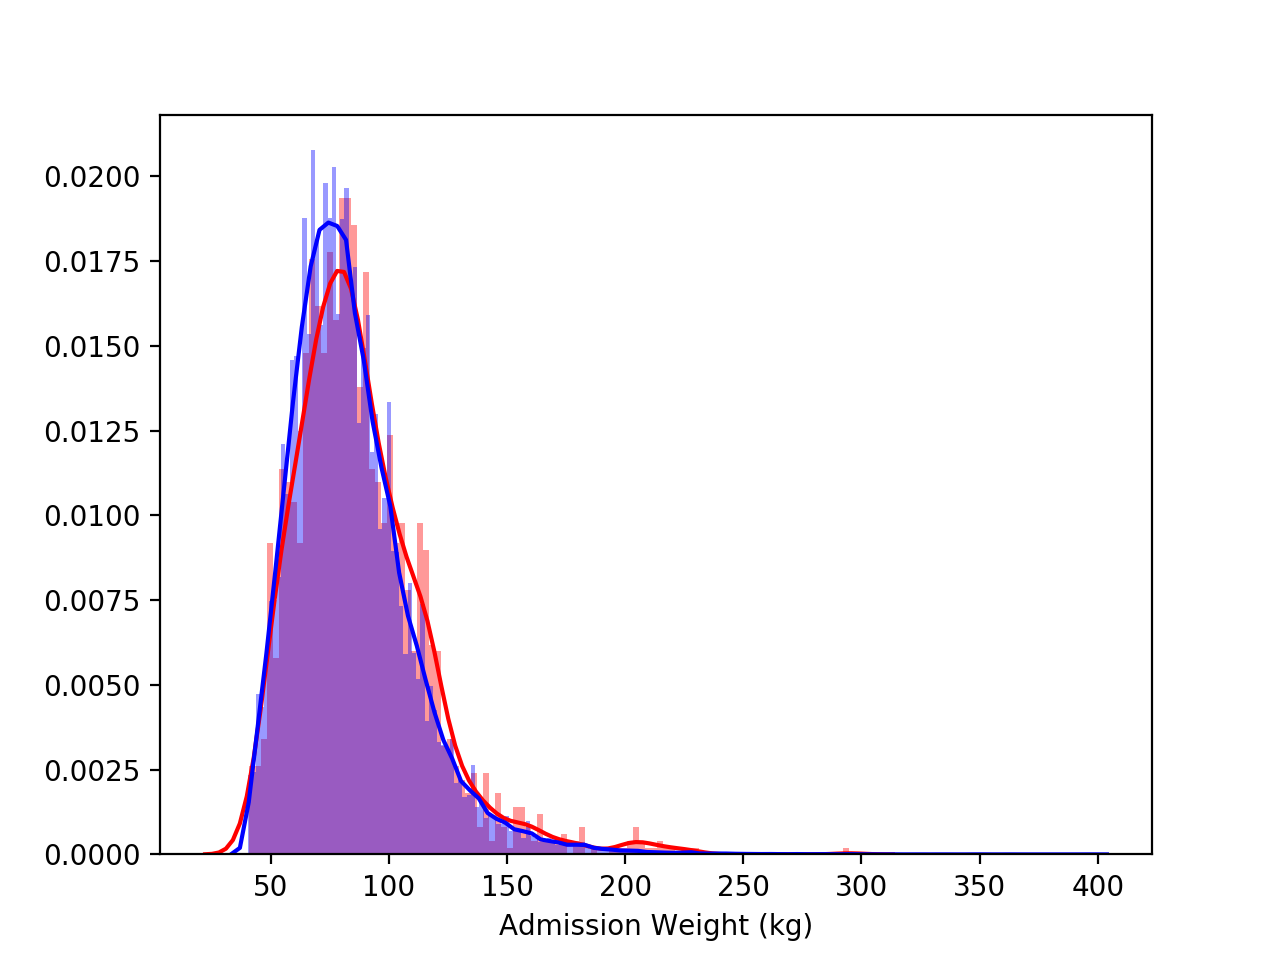

In [17]:
if do_plots == 1:
    %matplotlib notebook
    import seaborn as sns

    sns.distplot(patient['age'], bins=15)
    plt.xlabel('Age (yrs)')
    plt.title('Distribution of Age Among All Patients')

    plt.figure()
    sns.distplot(patient['admissionweight'], bins=200)
    plt.xlabel('Admission Weight (kg)')
    plt.title('Distribution of Weight Among All Patients')

    plt.figure()
    sns.distplot(patient_pos['admissionweight'], color='red')
    sns.distplot(patient_neg['admissionweight'], color='blue')
    plt.xlabel('Admission Weight (kg)')
    plt.legend('VTE', 'No VTE')

    plt.figure()
    sns.distplot(patient_pos['age'], color='red', bins=15)
    sns.distplot(patient_neg['age'], color='blue', bins=15)
    plt.xlabel('Age (years)')

    plt.figure()
    sns.distplot(patient_pos['admissionweight'], color='red', bins=100)
    sns.distplot(patient_neg['admissionweight'], color='blue', bins=200)
    plt.xlabel('Admission Weight (kg)')

In [12]:
if streamlit_status == 1:
    age = 30
    admissionweight = 50

if streamlit_status == 2:
    age = st.slider('Age', 19, 90)
    admissionweight = st.slider('Admission Weight (kg)', 40, 300)

if (streamlit_status == 1) | (streamlit_status == 2): 
    input_data = {'age': [age], 'admissionweight': [admissionweight]}
    X_test = pd.DataFrame(input_data, columns=['age', 'admissionweight'])

# Model and Predict

In [13]:
logisticRegr_sc = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
logisticRegr_sc.fit(X_train, y_train)

predictions_sc = logisticRegr_sc.predict(X_test)
prob_sc = logisticRegr_sc.predict_proba(X_test)[:,1]
#lprob_sc = logisticRegr_sc.predict_log_proba(X_test)[:,1]
if streamlit_status == 0:
    scores_sc = logisticRegr_sc.score(X_test, y_test)
    print(scores_sc)

0.5465459011360148


In [14]:
print('prob_sc:  min = ' + str(np.min(prob_sc)))
print('\t    max = ' + str(np.max(prob_sc)))

prob_sc:  min = 0.3849687588428042
	    max = 0.7653556396932468


160880 patients in negative class
1970 patients in positive class
If you predict 0 all the time, accuracy is 0.98790%


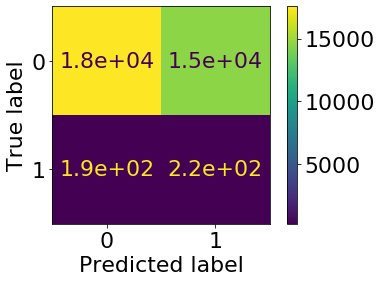

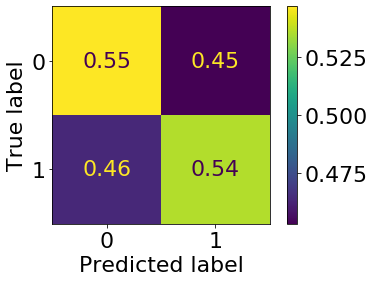

In [15]:
if streamlit_status == 0:
    
    # Print baseline accuracy
    N0_bl = patient[patient['label']==0].shape[0]
    N1_bl = patient[patient['label']==1].shape[0]
    print('{:d} patients in negative class'.format(N0_bl))
    print('{:d} patients in positive class'.format(N1_bl))
    print('If you predict 0 all the time, accuracy is {:.5f}%'.format(N0_bl/(N0_bl+N1_bl)))
    
    cm = confusion_matrix(list(y_test), predictions_sc)
    plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test))
    plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test),  normalize='true')
    
if streamlit_status == 1:
    print('The risk of VTE is: {:.2f}%'.format((100*prob_sc[0])))

if streamlit_status == 2:
    st.write('The risk of VTE is: {:.2f}'.format((100*prob_sc[0])))